# Project - Case Study on Company Stock Investment

## Introduction:
Time Series Project Explanation
This problem statement has 3 target column and 1-time axis
It is 3 project combined as one.
The company wants to know what the should be investing as after covid crashes it has become even harder to judge in what to invest.
As investing is a risky part we need to make 3 models to help the company.
Mind these things while working on it.

1. Time Series only have a time axis and a target axis.
2. We have to make 3 projects in which time is the common axis and target values are changing.
3. Stock detail you have is 2009 - 2017, prediction required Predict 2018 to 2021.
Note: We are in the year of 2020 end that means the company will test model from 2018 -2020 and if the results are accurate and match there existing data a prediction of 2021 will be made from your model. Which will have a high probability of being accurate.
4. As you have no way of finding out how it performed at production use split of train test validate.
5. Make 3 split of data one for train,one for test and final for validation.eg( 2009-2017 =8 year, 6yr - train,2- validate,-2 for test(last 2 year).
6. As we know past 3 to 4-year data is not a good choice, once you are done with all above a 4th model can be made with last 3-years and test with last year data 2017. This part is completely optional.


## Problem Statement:
We are providing you a company's Stock and investment details for the last 8 years. You need to predict the values for the upcoming years. Apply time series techniques to do the predictions. Also, follow the proper procedure to divide your data between training, validation and testing dataset. 

Stock detail years: 2009 - 2017
Prediction years:  2018 to 2021

The file contains company's last 8 years of stock details and investment details. As a big share of profit is invested to gold and oil, Its important to keep a watch over it.
You need to perform time series analysis over their dataset and give predictions for the next 4 years.This has to be done by observing model output and comparing it with 2018 - 2020.
We may judge how accurate model is predicting for year 2021.

Your model accuracy will not be disclosed as data belongs to the company. This comparison is done only for internal scoring and filtering.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima_model import ARIMA
import math
#plt.style.use('fivethirtyeight')
#from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

### Load Data

In [2]:
# Read Data
df = pd.read_csv('Company Stock and Investment.csv')
df.head()

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,31-12-2009,0.025417,0.000150,0.017354,0.006848
1,04-01-2010,0.026830,0.001097,0.015565,-0.004609
2,05-01-2010,0.002699,0.001560,0.001729,0.005900
3,06-01-2010,0.021688,0.006009,-0.015906,-0.018116
4,07-01-2010,-0.006256,0.000221,-0.001849,-0.017013


In [3]:
df.tail()

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
1979,09-11-2017,0.005984,0.000623,-0.002043,-0.003310
1980,10-11-2017,-0.007173,-0.000389,-0.006880,-0.003348
1981,13-11-2017,0.000352,-0.004944,-0.004008,0.003395
1982,14-11-2017,-0.019376,-0.002621,-0.015118,0.006793
1983,15-11-2017,-0.007006,0.005963,-0.013190,-0.008928


In [4]:
# Shape(rows,columns)
df.shape

(1984, 5)

In [5]:
#Datatypes
df.dtypes

Date                        object
Oil Investments            float64
Gold Investments           float64
Comp Stock                 float64
Other sharesInvestments    float64
dtype: object

In [6]:
# Missing Values
df.isna().sum()

Date                       0
Oil Investments            0
Gold Investments           0
Comp Stock                 0
Other sharesInvestments    0
dtype: int64

In [7]:
# Duplicated Entries
df.duplicated().sum()

0

In [8]:
# Statistical Summary
df.describe()

,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
count,1984.000000,1984.000000,1984.000000,1984.000000
mean,-0.000435,-0.020152,0.001007,0.001269
std,0.030869,0.140965,0.016017,0.019733
min,-1.000000,-1.000000,-0.123558,-0.126568
25%,-0.011021,-0.005881,-0.006926,-0.008492
50%,0.000277,0.000000,0.000876,0.000840
75%,0.010734,0.005454,0.009708,0.011632
max,0.119511,0.049577,0.088741,0.157457


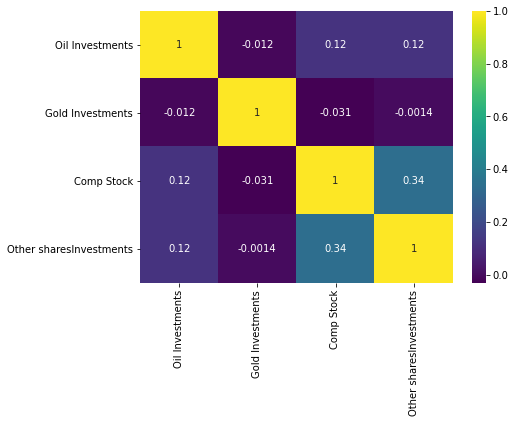

In [9]:
# Correlation
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(),cmap='viridis',annot=True)

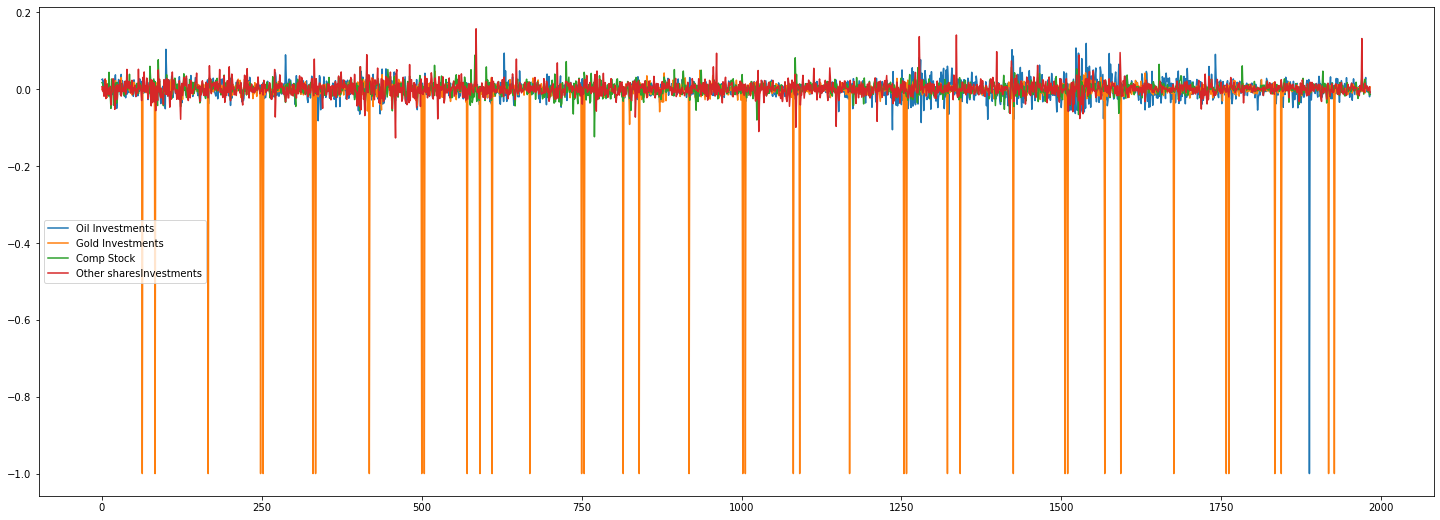

In [10]:
df.plot(figsize=(25,9))

In [11]:
# Parsing Date
parser = lambda dates: pd.datetime.strptime(dates,'%d-%m-%Y')
ds = pd.read_csv('Company Stock and Investment.csv',parse_dates=['Date'],index_col=['Date'],date_parser= parser)

In [12]:
ds2 = pd.read_csv('Company Stock and Investment.csv',parse_dates=['Date'],date_parser=parser)
ds2.dtypes

Date                       datetime64[ns]
Oil Investments                   float64
Gold Investments                  float64
Comp Stock                        float64
Other sharesInvestments           float64
dtype: object

In [13]:
ds.head(10)

,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
Date,,,,
2009-12-31,0.025417,0.000150,0.017354,0.006848
2010-01-04,0.026830,0.001097,0.015565,-0.004609
2010-01-05,0.002699,0.001560,0.001729,0.005900
2010-01-06,0.021688,0.006009,-0.015906,-0.018116
2010-01-07,-0.006256,0.000221,-0.001849,-0.017013
2010-01-08,0.001269,-0.013097,0.006648,0.027077
2010-01-11,-0.002417,0.023297,-0.008822,-0.024041
2010-01-12,-0.021202,-0.001518,-0.011375,-0.022715
2010-01-13,-0.013987,-0.020847,0.014106,0.013820


After spending many Hours on Oil & Gold Investments columns I cannot compute any of them. So, I decided to use the Company Stock Only. Because a)Oil Investments: Has p-value = 0 & Gold Investments: I cannot fully Understand about it.

In [14]:
ds1 = ds[['Comp Stock']]

In [15]:
ds1.head()

,Comp Stock
Date,
2009-12-31,0.017354
2010-01-04,0.015565
2010-01-05,0.001729
2010-01-06,-0.015906
2010-01-07,-0.001849


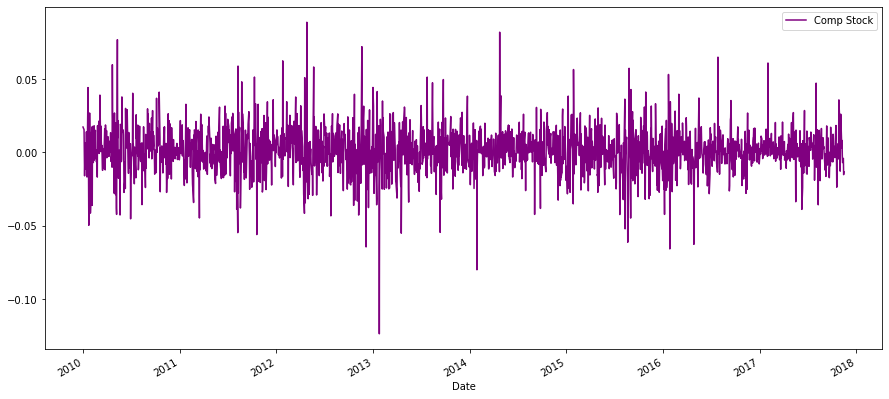

In [16]:
ds1.plot(figsize=(15,7),color='purple')

In [17]:
test_result=adfuller(ds1)

In [18]:

def adfuller_test(sales):
    result=adfuller(sales) # same as above ,variable name changed
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary")
    else:
        print("weak evidence against null hypothesis, time series is non-stationary ")

In [19]:
adfuller_test(ds1)

ADF Test Statistic : -12.473386265908271
p-value : 3.2077742930895363e-23
#Lags Used : 12
Number of Observations Used : 1971
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


In [20]:
ds1['Sales First Difference'] = ds1 - ds1.shift(1)

In [21]:
ds1.shift(1).head()

,Comp Stock,Sales First Difference
Date,,
2009-12-31,NaN,NaN
2010-01-04,0.017354,NaN
2010-01-05,0.015565,-0.001789
2010-01-06,0.001729,-0.013836
2010-01-07,-0.015906,-0.017635


In [22]:
ds1['Seasonal First Difference']=ds1['Comp Stock']-ds1['Comp Stock'].shift(12) 
#as seasonal its a 12 month data

In [23]:
ds1.head()

,Comp Stock,Sales First Difference,Seasonal First Difference
Date,,,
2009-12-31,0.017354,NaN,NaN
2010-01-04,0.015565,-0.001789,NaN
2010-01-05,0.001729,-0.013836,NaN
2010-01-06,-0.015906,-0.017635,NaN
2010-01-07,-0.001849,0.014058,NaN


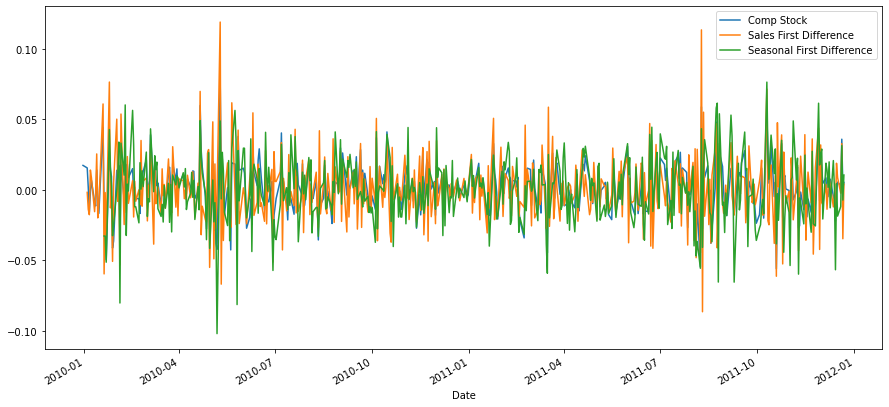

In [24]:
ds1.head(500).plot(figsize=(15,7))

In [25]:
adfuller_test(ds1['Seasonal First Difference'].dropna())

ADF Test Statistic : -13.237747334397264
p-value : 9.304187972231192e-25
#Lags Used : 26
Number of Observations Used : 1945
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


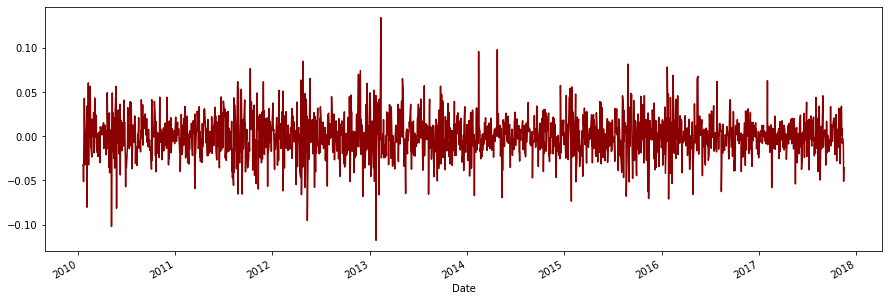

In [26]:
ds1['Seasonal First Difference'].plot(color='darkred',figsize=(15,5))

### Auto Regressive model

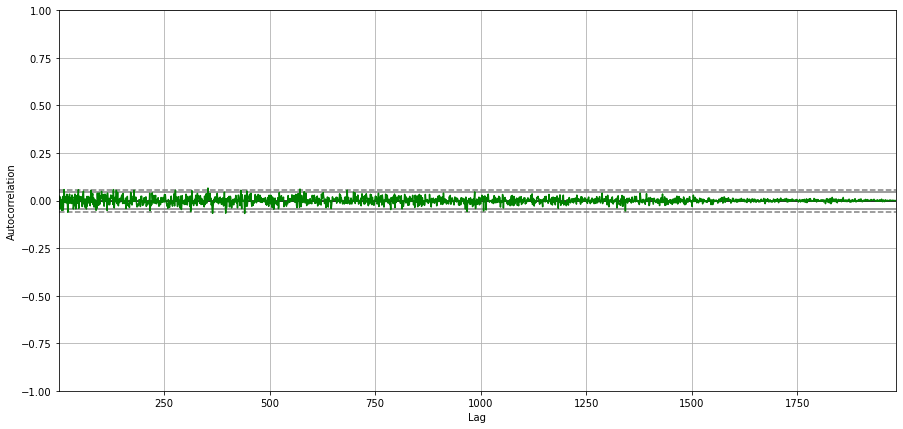

In [27]:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(15,7))
autocorrelation_plot(ds1['Comp Stock'],color='green')
plt.show()

In [28]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

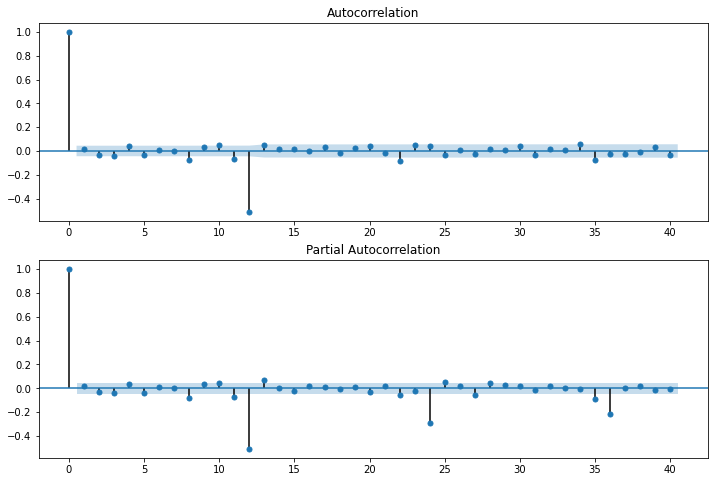

In [29]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
# First 12 values are null so we will start from 13
fig = sm.graphics.tsa.plot_acf(ds1['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ds1['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [30]:
model=ARIMA(ds1['Comp Stock'],order=(1,1,1)) # this order is p d q(0 or 1) 
model_fit=model.fit()

In [31]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.Comp Stock   No. Observations:                 1983
Model:                 ARIMA(1, 1, 1)   Log Likelihood                5373.983
Method:                       css-mle   S.D. of innovations              0.016
Date:                Mon, 02 Nov 2020   AIC                         -10739.966
Time:                        11:41:21   BIC                         -10717.597
Sample:                             1   HQIC                        -10731.749
                                                                              
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -9.078e-08    6.5e-06     -0.014      0.989   -1.28e-05    1.26e-05
ar.L1.D.Comp Stock     0.0284      0.023      1.217      0.224      -0.017       0.074
ma.L1.D.Comp Stock    -0.9831      0.013    -73.359      0.000      -1.009      -0.957
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           35.2595           +0.0000j           35.2595            0.0000
MA.1            1.0172           +0.0000j            1.0172            0.0000
-----------------------------------------------------------------------------
"""

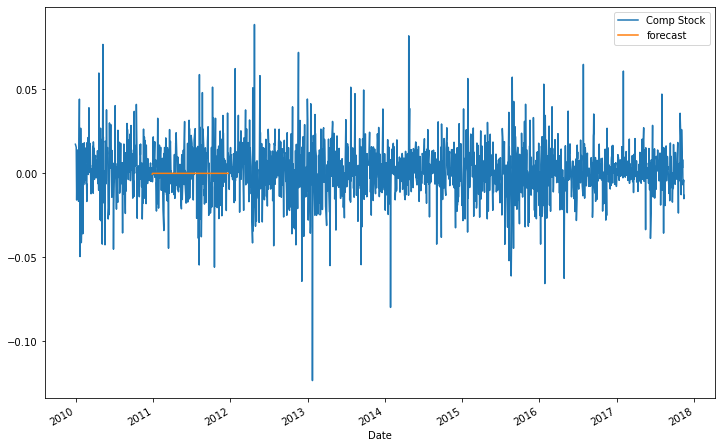

In [32]:
ds1['forecast']=model_fit.predict(start=250,end=500,dynamic=True)
ds1[['Comp Stock','forecast']].plot(figsize=(12,8))

In [33]:
import statsmodels.api as sm  # SARIMAX - seasonal arimax

In [34]:
model=sm.tsa.statespace.SARIMAX(ds1['Comp Stock'],order=(1, 1, 1),seasonal_order=(1,1,1,12)) #(p,d,q,Shift)
results=model.fit()

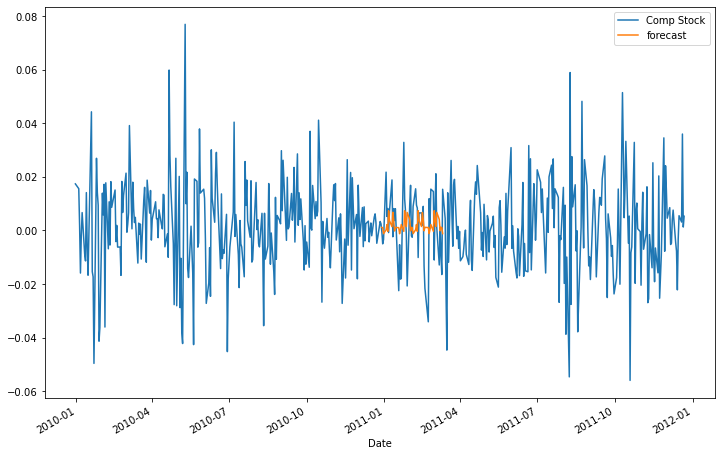

In [35]:
ds1['forecast']=results.predict(start=250,end=300,dynamic=True)
ds1[['Comp Stock','forecast']].head(500).plot(figsize=(12,8))

In [36]:
ds1_df = ds1.copy()
ds1_df.reset_index(inplace=True)
ds1_df.dtypes

Date                         datetime64[ns]
Comp Stock                          float64
Sales First Difference              float64
Seasonal First Difference           float64
forecast                            float64
dtype: object

## Creating DataFrame for forecasting

In [37]:
#creating some data to predict future of this.
from datetime import timedelta
from pandas.tseries.offsets import DateOffset

#future_dates=[data.index[-1]+ DateOffset(months=x)for x in range(0,24)]

ds1_df = ds1_df.append(pd.DataFrame({'Date': pd.date_range(start=ds1_df.Date.iloc[-1],end='2021-12-31')}))

ds1_df

,Date,Comp Stock,Sales First Difference,Seasonal First Difference,forecast
0,2009-12-31,0.017354,NaN,NaN,NaN
1,2010-01-04,0.015565,-0.001789,NaN,NaN
2,2010-01-05,0.001729,-0.013836,NaN,NaN
3,2010-01-06,-0.015906,-0.017635,NaN,NaN
4,2010-01-07,-0.001849,0.014058,NaN,NaN
...,...,...,...,...,...
1503,2021-12-27,NaN,NaN,NaN,NaN
1504,2021-12-28,NaN,NaN,NaN,NaN
1505,2021-12-29,NaN,NaN,NaN,NaN
1506,2021-12-30,NaN,NaN,NaN,NaN


In [38]:
ds1_df.set_index('Date',inplace=True)
ds1_df.tail()

,Comp Stock,Sales First Difference,Seasonal First Difference,forecast
Date,,,,
2021-12-27,NaN,NaN,NaN,NaN
2021-12-28,NaN,NaN,NaN,NaN
2021-12-29,NaN,NaN,NaN,NaN
2021-12-30,NaN,NaN,NaN,NaN
2021-12-31,NaN,NaN,NaN,NaN


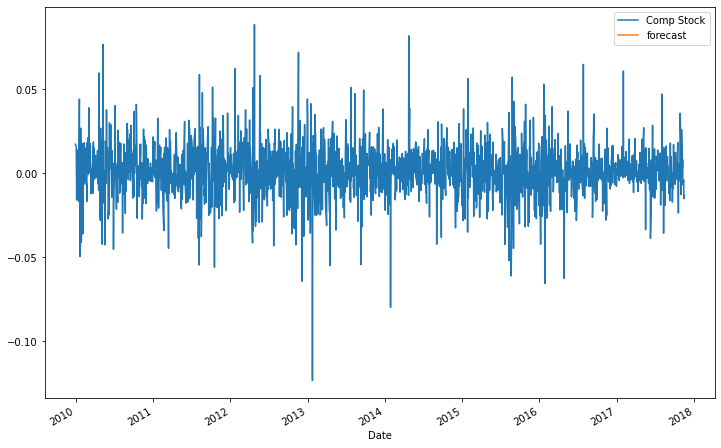

In [39]:
ds1_df['forecast'] = results.predict(start = 1500, end =3491 , dynamic= True)  
ds1_df[['Comp Stock', 'forecast']].plot(figsize=(12, 8))

In [40]:
pd.date_range(start='2018-01-01', end='2021-12-31')

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-25',
               '2021-12-26', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', length=1461, freq='D')